In [2]:
import music21
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import mnet
from networkx.readwrite import json_graph
import json
import pygame

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


Create path to access local files

In [3]:
'''
Creat local corpus with access pieces
'''

localCorpus = music21.corpus.corpora.LocalCorpus()
localCorpus.addPath('../library')
music21.corpus.cacheMetadata()
s = music21.corpus.parse('telemannfantasie1.xml')
flute = s[5]
flute_notes =flute.recurse().notes
notelst = list(flute_notes)
nodelst_basic=mnet.convert_basic(notelst)
g_basic=mnet.create_graph(nodelst_basic)

/opt/anaconda3/envs/music-network-env/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: local metadata cache: starting processing of paths: 2
/opt/anaconda3/envs/music-network-env/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: cache: filename: /var/folders/j6/2q7hftds7vb8_lsfy50l8lzw0000gn/T/music21/local.p.gz
bundles.py: WARNING: MetadataBundle Modification Time: 1594257200.284605
bundles.py: WARNING: Skipped 2 sources already in cache.
/opt/anaconda3/envs/music-network-env/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: cache: writing time: 0.017 md items: 2

/opt/anaconda3/envs/music-network-env/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: cache: filename: /var/folders/j6/2q7hftds7vb8_lsfy50l8lzw0000gn/T/music21/local.p.gz
caching.py: WARNING: cache: final writing time: 0.018 seconds


# Saving Graph

Write graph as .gexf

In [4]:
nx.write_gexf(g_basic, "basic_composition.gexf")

Save as json string

In [5]:
data = json_graph.node_link_data( mnet.convert_to_weighted(g_basic))

with open('basic.json', 'w') as outfile:
    json.dump(data, outfile)

# Run and save random walk

In [6]:
randomwalk_basic=mnet.generate_randomwalk(g_basic)

In [7]:
randomwalk_basic

['A4',
 'B4',
 'E4',
 'C#5',
 'E5',
 'A5',
 'A4',
 'C#5',
 'D5',
 'A5',
 'G#5',
 'A5',
 'C#5',
 'B4',
 'A5',
 'G#5',
 'A5',
 'A4',
 'B4',
 'C#5',
 'B4',
 'A4',
 'A5',
 'F#5',
 'C#5',
 'B4',
 'A4',
 'F#5',
 'F#5',
 'G#5',
 'A5',
 'C#5',
 'E5',
 'C#5',
 'D5',
 'F#5',
 'D#5',
 'E5',
 'G#4',
 'C#5',
 'B4',
 'C#5',
 'A5',
 'A5',
 'A4']

# Convert To Audio

Converting to mp3 wav looks very complicated withing python, I havne't found working framework. To play audio (from python), can use pygame

Uses conversion function strto16thnote, which takes a pitch string and converts it to a note with length of 16th note

In [18]:
tune = mnet.strto16thnote(randomwalk_basic)
new_composition_basic = mnet.convert_to_stream(tune)

#explicitly set tempo at quarter = 60 (each beat = 250 ms)
tm2 = music21.tempo.MetronomeMark(number=60)
s2=music21.stream.Stream([tm2, new_composition_basic])


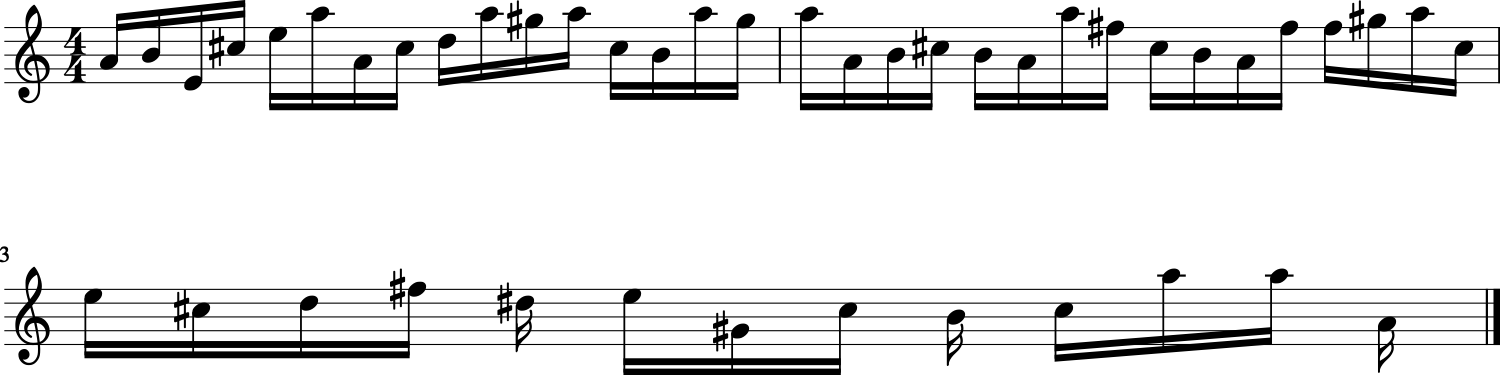

In [19]:
s2.show()

In [20]:
sp = music21.midi.realtime.StreamPlayer(s2)

sp.play()